In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from hw4 import show
# from hw3.libs.algorithms.pca import PCA
from hw4.libs.new_pca import PCA
from hw4.libs.dataset import Dataset

In [3]:
img_size = 28
shapes = (img_size, img_size) 
# n_dataset = 982
# npz_dataset = "./hw4/digits-labels.npz"


In [4]:
# compressed = np.load(npz_dataset)
# d = compressed['d'] # capture extracted features
# l = compressed['l'] # captures the labels of corresponding d matrix
# max_digit = len(d)
# print(len(l))
# print(type(int(l[0])))

In [5]:
# idx_5s = []
# for i in range(0, max_digit):
#     if int(l[i]) == 5:
#         idx_5s.append(i)
# print(idx_5s)
# print(len(idx_5s))


In [6]:
# fives = np.zeros(( (img_size**2), 72))
# fives = np.zeros(( (img_size**2), len(idx_5s)))
# for i in range(0, len(idx_5s)):
#     fives[:, i] = d[:, idx_5s[i]]
# print(len(fives))
# print(len(fives[0]))


In [20]:
dataset = Dataset()
fives = dataset.get_5s().T
d = dataset.get_dataset().T
type(fives)
type(d)

numpy.ndarray

In [8]:
import glob
import cv2

images = []
for path in glob.glob("./hw3/four_dataset/*.jpg"):
    images.append(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY))
flat_images = np.array(images).reshape(982, -1)
type(flat_images)

numpy.ndarray

In [9]:
# i = 2
# # plt.imshow(np.reshape(fives[:, i],(28, 28),'F'))
# plt.imshow(np.reshape(fives[:, i], shapes, 'F'))
# plt.show()

In [10]:
# i = 15
# plt.imshow(np.reshape(d[:, i], (28, 28),'F'))
# plt.show()

In [11]:
# fig, numplt = plt.subplots(9, 8, subplot_kw=dict(xticks=[], yticks=[]))
# for i, axis in enumerate(numplt.flat):
#     axis.imshow(np.reshape(fives[:, i], (28, 28), 'F'))
    # axis.imshow(fives[700*i].reshape(28, 28), cmap='gray_r')

In [12]:
# n_comp = 2
# n_dataset = len(fives[0])
# print(" ** n_dataset = ", n_dataset)
# pca = PCA(img_size=img_size, n_dataset=n_dataset, n_comp=n_comp, man_dataset=fives)
# # pca = PCA(img_size, n_dataset, n_comp, man_dataset=fives)
# # n_dataset = 982
# # pca = PCA(img_size, n_dataset, n_comp)
# pca.run(plot=False)

In [21]:
# Perform PCA transform
n_comp = 2
pca = PCA(fives, n_comp)
pca_images, components = pca.run()
type(pca_images)

numpy.ndarray

In [22]:
# Reconstruct from PCA reduction
reconstructed_img = pca.inverse_pca(pca_images, components)
type(reconstructed_img)

/home/ardihikaru/devel/nctu/mlsp/hw4/libs/new_pca.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstruct = np.dot(pca_img, components.T).astype(int)


numpy.ndarray

In [24]:
print(pca_images.shape)
print(reconstructed_img.shape)
print(fives.shape)

(72, 2)
(72, 28, 28)
(72, 784)


In [25]:
# Compute MSE between original image and reconstructed image
# mse = [pca.mean_square_error(a,b) for a,b in zip(images, reconstructed_img)]
# print("Dimension {}, best MSE: {}, worst MSE: {}, MSE over all samples: {}".format(n_comp, min(mse), max(mse), sum(mse)/len(mse)))
        

Dimension 2, best MSE: 3559.839285714286, worst MSE: 13221.871173469388, MSE over all samples: 6599.57670776644


In [16]:
# idx = 1
# data = pca.get_original_data()
# rec_data = pca.get_reconstructed_data()
# type(rec_data)
# rec_data_01 = rec_data[:, idx]
# type(rec_data_01)
# 
# ori_data_sp = data[:, idx].reshape(28, 28)
# rec_data_sp = rec_data[:, idx].reshape(28, 28)
# type(rec_data_sp)
# 
# f, (ax1, ax2) = plt.subplots(1, 2)
# f.suptitle('PCA comparison with #Dim = %s' % 2)
# ax1.imshow(ori_data, cmap='gray', interpolation='none')
# ax1.set_title('Original Image')
# ax2.imshow(rec_data, cmap='gray', interpolation='none')
# ax2.set_title('Compressed Image')
# plt.show()

In [17]:
# proj = pca.get_reconstructed_data()
# print(type(proj))
# print(type(fives))

In [18]:
# proj = proj.T
# fives = fives.T
# type(proj)
# type(fives)

/home/ardihikaru/devel/nctu/mlsp/penv/lib/python3.6/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/home/ardihikaru/devel/nctu/mlsp/penv/lib/python3.6/site-packages/matplotlib/text.py:1759: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
/home/ardihikaru/devel/nctu/mlsp/penv/lib/python3.6/site-packages/matplotlib/text.py:1761: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))


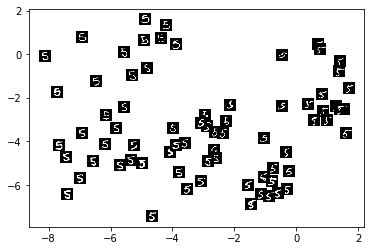

In [26]:
from hw4.libs.projection import Projection
my_plt = Projection()
my_plt.proj_show(pca_images, fives)
# my_plt.proj_show(proj, fives)



